#### Djikstra:

Dijkstra's algorithm finds the shortest path from one vertex to all other vertices

#### How to find Shortest Paths from Source to all Vertices using Dijkstra’s Algorithm

Given a weighted graph and a source vertex in the graph, find the shortest paths from the source to all the other vertices in the given graph.

Note: The given graph does not contain any negative edge.

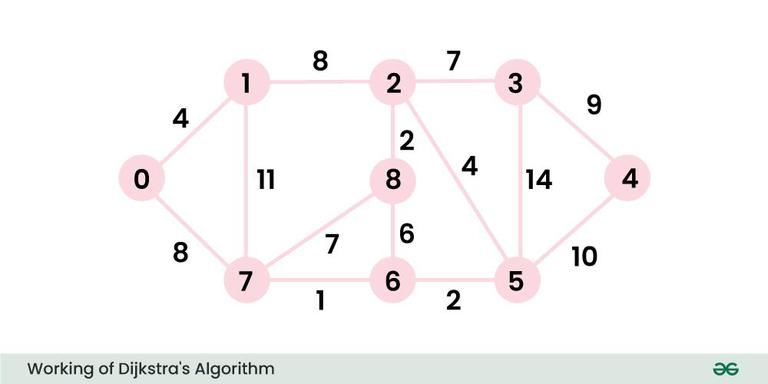

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/Working-of-Dijkstras-Algorithm-768.jpg")

Output: 0 4 12 19 21 11 9 8 14

Explanation: The distance from 0 to 1 = 4.

The minimum distance from 0 to 2 = 12. 0->1->2

The minimum distance from 0 to 3 = 19. 0->1->2->3

The minimum distance from 0 to 4 = 21. 0->7->6->5->4

The minimum distance from 0 to 5 = 11. 0->7->6->5

The minimum distance from 0 to 6 = 9. 0->7->6

The minimum distance from 0 to 7 = 8. 0->7

The minimum distance from 0 to 8 = 14. 0->1->2->8

#### Dijkstra’s Algorithm using Adjacency Matrix :

The idea is to generate a SPT (shortest path tree) with a given source as a root. Maintain an Adjacency Matrix with two sets,

- one set contains vertices included in the shortest-path tree,
- other set includes vertices not yet included in the shortest-path tree.

At every step of the algorithm, find a vertex that is in the other set (set not yet included) and has a minimum distance from the source.

#### Algorithm :

1. Create a set sptSet (shortest path tree set) that keeps track of vertices included in the shortest path tree, i.e., whose minimum distance from the source is calculated and finalized. Initially, this set is empty.
2. Assign a distance value to all vertices in the input graph. Initialize all distance values as INFINITE . Assign the distance value as 0 for the source vertex so that it is picked first.
3. While sptSet doesn’t include all vertices
    - Pick a vertex u that is not there in sptSet and has a minimum distance value.
    - Include u to sptSet .
    - Then update the distance value of all adjacent vertices of u .
        - To update the distance values, iterate through all adjacent vertices.
        - For every adjacent vertex v, if the sum of the distance value of u (from source) and weight of edge u-v , is less than the distance value of v , then update the distance value of v .
        
Note: We use a boolean array sptSet[] to represent the set of vertices included in SPT . If a value sptSet[v] is true, then vertex v is included in SPT , otherwise not. Array dist[] is used to store the shortest distance values of all vertices.

#### Illustration of Dijkstra Algorithm :

To understand the Dijkstra’s Algorithm lets take a graph and find the shortest path from source to all nodes.

Consider below graph and src = 0

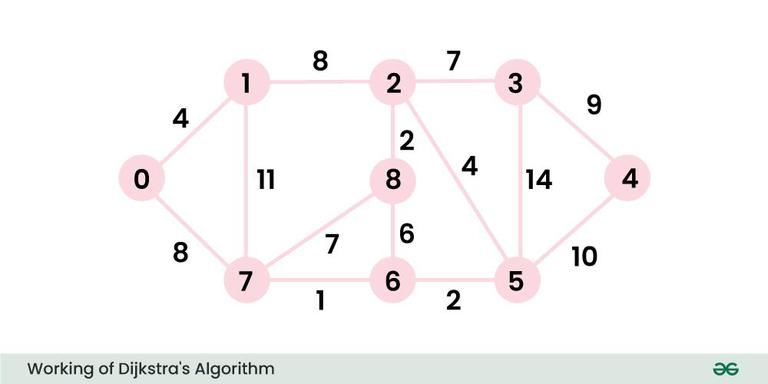

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/1.jpg")

Step 1:

- The set sptSet is initially empty and distances assigned to vertices are {0, INF, INF, INF, INF, INF, INF, INF} where INF indicates infinite.
- Now pick the vertex with a minimum distance value. The vertex 0 is picked, include it in sptSet . So sptSet becomes {0}. After including 0 to sptSet , update distance values of its adjacent vertices.
- Adjacent vertices of 0 are 1 and 7. The distance values of 1 and 7 are updated as 4 and 8.

The following subgraph shows vertices and their distance values, only the vertices with finite distance values are shown. The vertices included in SPT are shown in green colour.

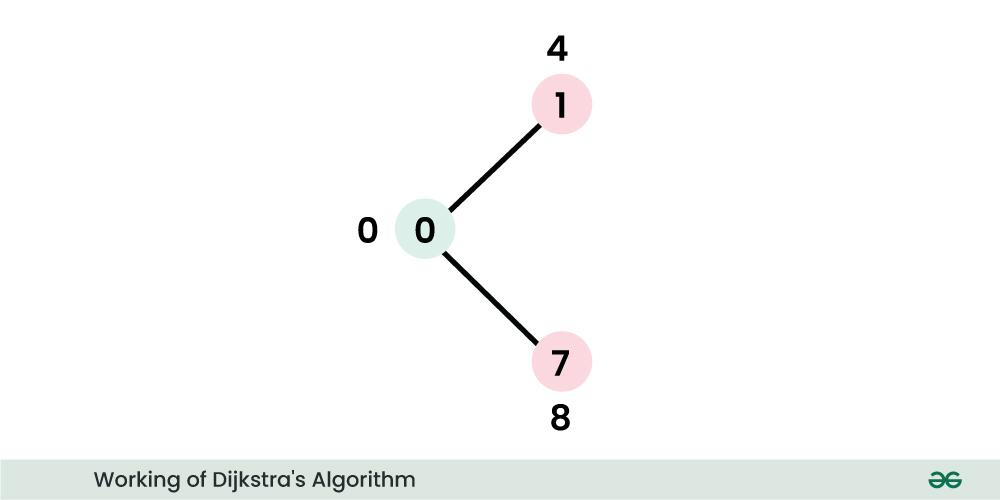

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/2.jpg")

Step 2:

- Pick the vertex with minimum distance value and not already included in SPT (not in sptSET ). The vertex 1 is picked and added to sptSet .
- So sptSet now becomes {0, 1}. Update the distance values of adjacent vertices of 1.
- The distance value of vertex 2 becomes 12 .

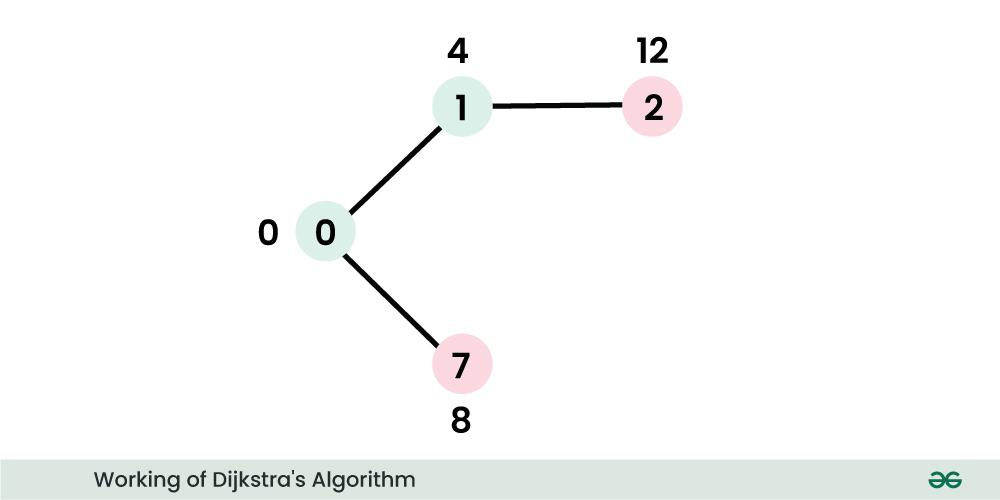

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/3.jpg")

Step 3:

- Pick the vertex with minimum distance value and not already included in SPT (not in sptSET ). Vertex 7 is picked. So sptSet now becomes {0, 1, 7}.
- Update the distance values of adjacent vertices of 7. The distance value of vertex 6 and 8 becomes finite ( 15 and 9 respectively).

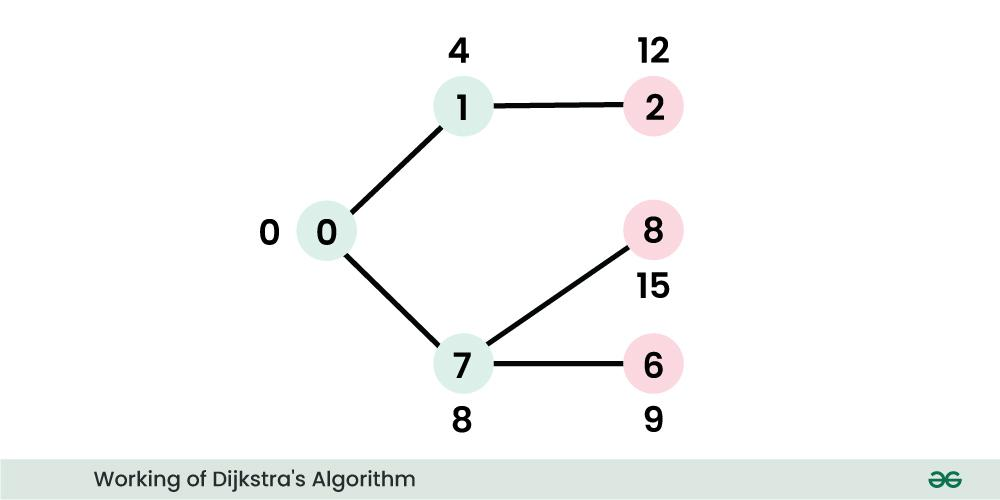

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/4.jpg")

Step 4:

- Pick the vertex with minimum distance value and not already included in SPT (not in sptSET ). Vertex 6 is picked. So sptSet now becomes {0, 1, 7, 6} .
- Update the distance values of adjacent vertices of 6. The distance value of vertex 5 and 8 are updated.

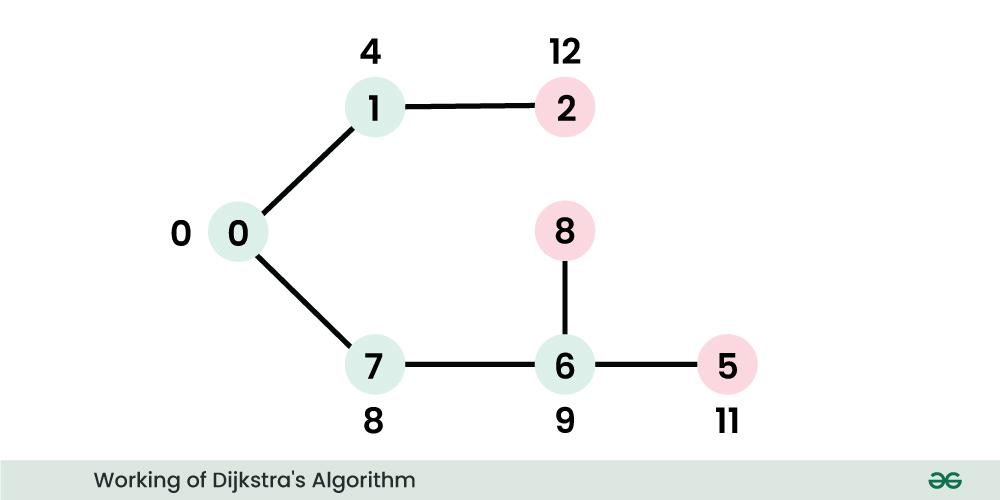

In [7]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/5.jpg")

We repeat the above steps until sptSet includes all vertices of the given graph. Finally, we get the following S hortest Path Tree (SPT).

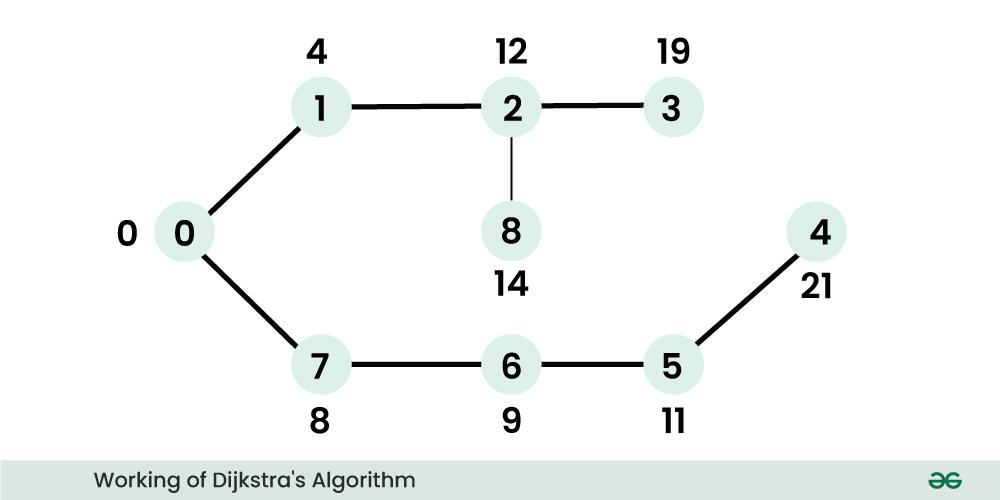

In [8]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/6.jpg")

In [9]:
import sys
class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    def minDistance(self, dist, sptSet):
        min = sys.maxsize
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u

        return min_index

    def dijkstra(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V

        for cout in range(self.V):
            x = self.minDistance(dist, sptSet)
            sptSet[x] = True
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                        dist[y] > dist[x] + self.graph[x][y]:
                    dist[y] = dist[x] + self.graph[x][y]

        self.printSolution(dist)

if __name__ == "__main__":
    g = Graph(9)
    g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
               [4, 0, 8, 0, 0, 0, 0, 11, 0],
               [0, 8, 0, 7, 0, 4, 0, 0, 2],
               [0, 0, 7, 0, 9, 14, 0, 0, 0],
               [0, 0, 0, 9, 0, 10, 0, 0, 0],
               [0, 0, 4, 14, 10, 0, 2, 0, 0],
               [0, 0, 0, 0, 0, 2, 0, 1, 6],
               [8, 11, 0, 0, 0, 0, 1, 0, 7],
               [0, 0, 2, 0, 0, 0, 6, 7, 0]
               ]

    g.dijkstra(0)

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14


#### Time Complexity: O(V 2 )
#### Auxiliary Space: O(V)

#### Notes:

- The code calculates the shortest distance but doesn’t calculate the path information. Create a parent array, update the parent array when distance is updated and use it to show the shortest path from source to different vertices.
- The time Complexity of the implementation is O(V 2 ) . If the input graph is represented using adjacency list , it can be reduced to O(E * log V) with the help of a binary heap. Please see Dijkstra’s Algorithm for Adjacency List Representation for more details.
- Dijkstra’s algorithm doesn’t work for graphs with negative weight cycles.

#### Why Dijkstra’s Algorithms fails for the Graphs having Negative Edges ?

The problem with negative weights arises from the fact that Dijkstra’s algorithm assumes that once a node is added to the set of visited nodes, its distance is finalized and will not change. However, in the presence of negative weights, this assumption can lead to incorrect results.

Consider the following graph for the example:

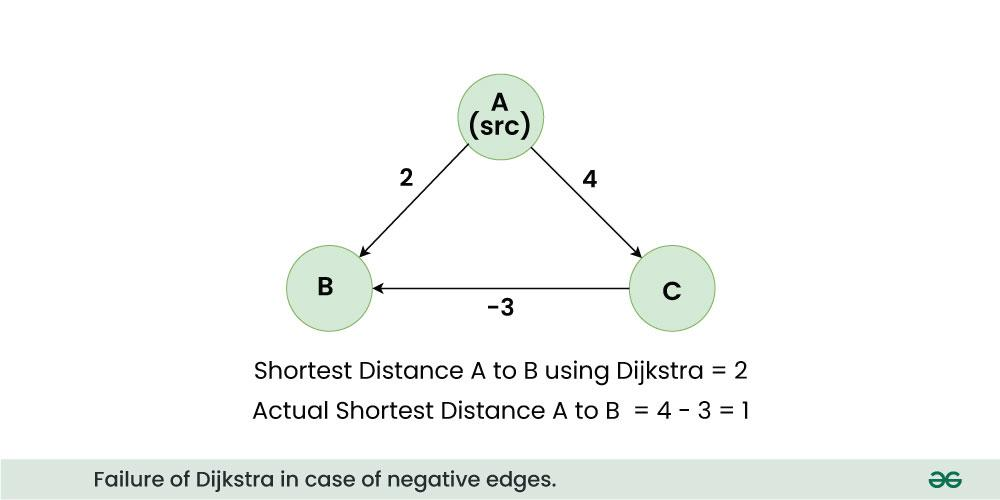

In [10]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/7.jpg")

In the above graph, A is the source node, among the edges A to B and A to C , A to B is the smaller weight and Dijkstra assigns the shortest distance of B as 2, but because of existence of a negative edge from C to B , the actual shortest distance reduces to 1 which Dijkstra fails to detect.

Note: We use Bellman Ford’s Shortest path algorithm in case we have negative edges in the graph.

#### Dijkstra’s Algorithm using Adjacency List in O(E logV):

For Dijkstra’s algorithm, it is always recommended to use Heap (or priority queue ) as the required operations (extract minimum and decrease key) match with the speciality of the heap (or priority queue). However, the problem is, that priority_queue doesn’t support the decrease key. To resolve this problem, do not update a key, but insert one more copy of it. So we allow multiple instances of the same vertex in the priority queue. This approach doesn’t require decreasing key operations and has below important properties.

Whenever the distance of a vertex is reduced, we add one more instance of a vertex in priority_queue. Even if there are multiple instances, we only consider the instance with minimum distance and ignore other instances.
The time complexity remains O(E * LogV) as there will be at most O(E) vertices in the priority queue and O(logE) is the same as O(logV)

In [11]:
import heapq
iPair = tuple
class Graph:
    def __init__(self, V: int): # Constructor
        self.V = V
        self.adj = [[] for _ in range(V)]

    def addEdge(self, u: int, v: int, w: int):
        self.adj[u].append((v, w))
        self.adj[v].append((u, w))

    def shortestPath(self, src: int):
        pq = []
        heapq.heappush(pq, (0, src))
        dist = [float('inf')] * self.V
        dist[src] = 0

        while pq:
            d, u = heapq.heappop(pq)
            for v, weight in self.adj[u]:
                if dist[v] > dist[u] + weight:
                    dist[v] = dist[u] + weight
                    heapq.heappush(pq, (dist[v], v))

        for i in range(self.V):
            print(f"{i} \t\t {dist[i]}")

if __name__ == "__main__":
    V = 9
    g = Graph(V)
    g.addEdge(0, 1, 4)
    g.addEdge(0, 7, 8)
    g.addEdge(1, 2, 8)
    g.addEdge(1, 7, 11)
    g.addEdge(2, 3, 7)
    g.addEdge(2, 8, 2)
    g.addEdge(2, 5, 4)
    g.addEdge(3, 4, 9)
    g.addEdge(3, 5, 14)
    g.addEdge(4, 5, 10)
    g.addEdge(5, 6, 2)
    g.addEdge(6, 7, 1)
    g.addEdge(6, 8, 6)
    g.addEdge(7, 8, 7)
    g.shortestPath(0)


0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


#### Time Complexity: O(E * logV), Where E is the number of edges and V is the number of vertices.

#### Auxiliary Space: O(V)

#### Applications of Dijkstra’s Algorithm:

- Google maps uses Dijkstra algorithm to show shortest distance between source and destination.
- In computer networking , Dijkstra’s algorithm forms the basis for various routing protocols, such as OSPF (Open Shortest Path First) and IS-IS (Intermediate System to Intermediate System).
- Transportation and traffic management systems use Dijkstra’s algorithm to optimize traffic flow, minimize congestion, and plan the most efficient routes for vehicles.
- Airlines use Dijkstra’s algorithm to plan flight paths that minimize fuel consumption, reduce travel time.
- Dijkstra’s algorithm is applied in electronic design automation for routing connections on integrated circuits and very-large-scale integration (VLSI) chips.

In [1]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight  # For undirected graph

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def dijkstra(self, start_vertex_data):
        start_vertex = self.vertex_data.index(start_vertex_data)
        cost = [float('inf')] * self.size
        cost[start_vertex] = 0
        visited = [False] * self.size

        for _ in range(self.size):
            min_cost = float('inf')
            u = None
            for i in range(self.size):
                if not visited[i] and cost[i] < min_cost:
                    min_cost = cost[i]
                    u = i

            if u is None:
                break

            visited[u] = True

            for v in range(self.size):
                if self.adj_matrix[u][v] != 0 and not visited[v]:
                    alt = cost[u] + self.adj_matrix[u][v]
                    if alt < cost[v]:
                        cost[v] = alt

        return cost

g = Graph(7)

g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

g.add_edge(3, 0, 4)  # D - A, weight 5
g.add_edge(3, 4, 2)  # D - E, weight 2
g.add_edge(0, 2, 3)  # A - C, weight 3
g.add_edge(0, 4, 4)  # A - E, weight 4
g.add_edge(4, 2, 4)  # E - C, weight 4
g.add_edge(4, 6, 5)  # E - G, weight 5
g.add_edge(2, 5, 5)  # C - F, weight 5
g.add_edge(2, 1, 2)  # C - B, weight 2
g.add_edge(1, 5, 2)  # B - F, weight 2
g.add_edge(6, 5, 5)  # G - F, weight 5

# Dijkstra's algorithm from D to all vertices
print("Dijkstra's Algorithm starting from vertex D:\n")
distances = g.dijkstra('D')
for i, d in enumerate(distances):
    print(f"Shortest distance from D to {g.vertex_data[i]}: {d}")


Dijkstra's Algorithm starting from vertex D:

Shortest distance from D to A: 4
Shortest distance from D to B: 8
Shortest distance from D to C: 6
Shortest distance from D to D: 0
Shortest distance from D to E: 2
Shortest distance from D to F: 10
Shortest distance from D to G: 7
